In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/A_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/E_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/L_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/N_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/S_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/D_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/G_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/I_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/W_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/M_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/nothing_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/X_test.jpg
/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/H_test.jpg
/kaggle/input/asl-alphabet/asl_a

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob
from PIL import ImageFile
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import Callback,EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report, log_loss, accuracy_score, confusion_matrix 

In [3]:
train_path = "../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"

In [4]:
train = list(glob.glob(train_path+"/**/*.jpg"))

In [5]:
ht = os.path.split("../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A/A1.jpg")

In [6]:
ht[0]

'../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/A'

In [8]:
ht[1]

'A1.jpg'

In [7]:
def image_process(filepath):
    
    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))
    
    filepath = pd.DataFrame(filepath, columns=["Filepath"]).astype(str)
    
    labels = pd.DataFrame(labels, columns=["Label"])
    
    df = pd.concat([filepath, labels], axis=1)
    
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [8]:
training_df = image_process(train)

In [9]:
print("Number of training pictures: ", training_df.shape[0])

Number of training pictures:  87000


In [24]:
training_df["Filepath"][11000]

'../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/B/B685.jpg'

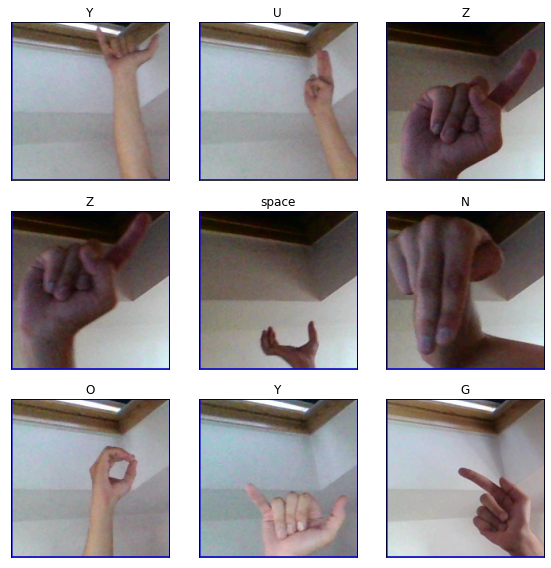

In [10]:
## Plotting Some Pictures
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(training_df.Filepath[i]))
    ax.set_title(training_df.Label[i])
plt.tight_layout()
plt.show()

In [12]:
train_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
                                    validation_split=0.2)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input)

In [13]:
X_train_df, X_test_df = train_test_split(training_df.sample(frac = 0.05), test_size = 0.2, random_state = 0)

In [16]:
train_images = train_generator.flow_from_dataframe(
    dataframe=X_train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(200, 200),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=X_train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(200, 200),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=X_test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(200, 200),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

# # Load the pretained model
# pretrained_model = tf.keras.applications.MobileNetV2(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights='imagenet',
#     pooling='avg'
# )

Found 2784 validated image filenames belonging to 29 classes.
Found 696 validated image filenames belonging to 29 classes.
Found 870 validated image filenames belonging to 29 classes.


In [17]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(200, 200, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [18]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(29, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [19]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              mode='auto')]

In [21]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,
    callbacks = my_callbacks
)

Epoch 1/50
87/87 [==============================] - 33s 281ms/step - loss: 2.8118 - accuracy: 0.2428 - val_loss: 1.1054 - val_accuracy: 0.6925
Epoch 2/50
87/87 [==============================] - 7s 86ms/step - loss: 0.7900 - accuracy: 0.7961 - val_loss: 0.5263 - val_accuracy: 0.8520
Epoch 3/50
87/87 [==============================] - 8s 91ms/step - loss: 0.3710 - accuracy: 0.9103 - val_loss: 0.4442 - val_accuracy: 0.8578
Epoch 4/50
87/87 [==============================] - 7s 84ms/step - loss: 0.2312 - accuracy: 0.9445 - val_loss: 0.3652 - val_accuracy: 0.8879
Epoch 5/50
87/87 [==============================] - 8s 86ms/step - loss: 0.1375 - accuracy: 0.9748 - val_loss: 0.2481 - val_accuracy: 0.9267
Epoch 6/50
87/87 [==============================] - 8s 87ms/step - loss: 0.0833 - accuracy: 0.9867 - val_loss: 0.2137 - val_accuracy: 0.9425
Epoch 7/50
87/87 [==============================] - 8s 87ms/step - loss: 0.0701 - accuracy: 0.9923 - val_loss: 0.2155 - val_accuracy: 0.9310
Epoch 8/50


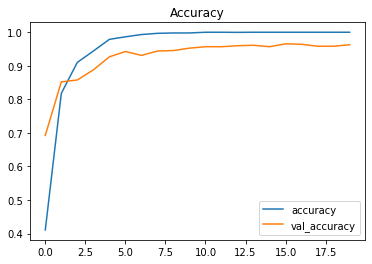

In [22]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

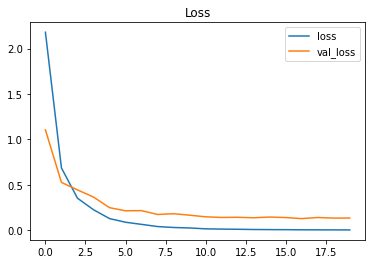

In [23]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [24]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.13230
Test Accuracy: 95.98%


In [25]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

print(f'The first 5 predictions: {pred[:5]}')

The first 5 predictions: ['C', 'space', 'D', 'H', 'F']


In [27]:
y_test = list(X_test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           A       1.00      0.94      0.97        32
           B       1.00      1.00      1.00        28
           C       1.00      1.00      1.00        22
           D       0.98      1.00      0.99        41
           E       0.90      1.00      0.95        27
           F       1.00      0.84      0.92        32
           G       0.90      0.85      0.88        33
           H       0.88      0.97      0.92        36
           I       0.96      1.00      0.98        24
           J       0.96      0.86      0.91        29
           K       1.00      1.00      1.00        29
           L       0.96      1.00      0.98        25
           M       0.87      0.94      0.90        35
           N       0.97      0.89      0.93        35
           O       1.00      1.00      1.00        37
           P       0.94      1.00      0.97        32
           Q       1.00      1.00      1.00        23
           R       1.00    

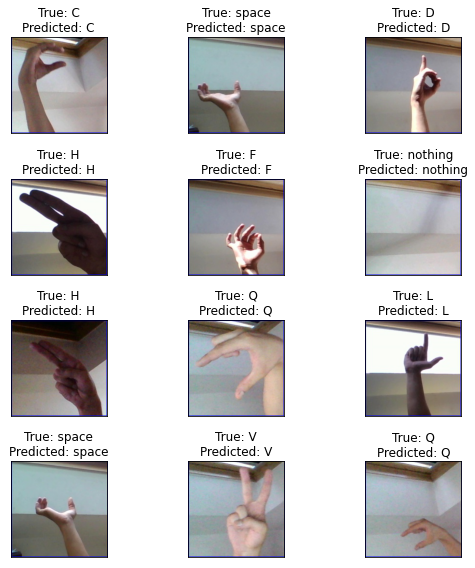

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {X_test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [30]:
model.save('./asl_alphabet.h5')